Statistical Description and Exploratory Analysis on Aviation Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
url = 'https://raw.githubusercontent.com/zzzhimin/DSAI-Mini-Project/master/AviationData.csv'
baseData = pd.read_csv(url,encoding = "ISO-8859-1")

In [3]:
baseData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


In [4]:
baseData.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [5]:
aviationData = pd.DataFrame(baseData[['Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Purpose.of.Flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.Phase.of.Flight']])

In [6]:
aviationData = aviationData[aviationData['Aircraft.Category'] == 'Airplane']
aviationData = aviationData.drop('Aircraft.Category', axis=1)
aviationData.head()

,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight
0,39.128611,-123.715833,Non-Fatal,Substantial,Cessna,175,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF
1,38.846111,-94.736111,Fatal(2),Destroyed,Mooney,M20S,1.0,Reciprocating,Part 91: General Aviation,Personal,2.0,NaN,NaN,NaN,VMC,TAKEOFF
2,64.666945,-148.133334,Non-Fatal,Substantial,Cessna,170,1.0,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,2.0,NaN,NaN
3,32.365556,-97.645000,Non-Fatal,Substantial,Vans,RV 10,NaN,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,1.0,NaN,NaN
5,30.176111,-92.007500,Fatal(5),Destroyed,Piper,PA 31T,2.0,Turbo Prop,Part 91: General Aviation,Executive/Corporate,5.0,2.0,2.0,NaN,IMC,TAKEOFF


In [7]:
for i in aviationData:
    if(aviationData[i].dtypes == 'float64'):# and i != 'Latitude' and i != 'Longitude'
        aviationData[i] = aviationData[i].fillna(0)
    else:
        aviationData[i] = aviationData[i].fillna("Unknown")

In [8]:
for i in aviationData:
    if(aviationData[i].dtypes == 'float64' and i != 'Latitude' and i != 'Longitude'):
        aviationData[i] = aviationData[i].astype(np.int64)

In [9]:
aviationData.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000
mean,29.410760,-72.447168,1.063431,0.595698,0.179558,0.317281,5.932369
std,18.920398,51.688149,0.505409,5.707075,0.899529,3.270591,31.434299
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.307222,-107.869167,1.000000,0.000000,0.000000,0.000000,0.000000
50%,35.125556,-85.493055,1.000000,0.000000,0.000000,0.000000,1.000000
75%,41.250833,-6.223056,1.000000,0.000000,0.000000,0.000000,2.000000
max,87.145833,176.071389,8.000000,295.000000,66.000000,380.000000,588.000000


In [10]:
aviationData['Response'] = 0
aviationData['Response'] = aviationData.Response.astype(float)

In [11]:
for index, row in aviationData.iterrows():
    if(row['Injury.Severity'] != 'Non-Fatal' and row['Injury.Severity'] != 'Unavailable' and row['Injury.Severity'] != 'Incident'):
        aviationData.at[index, 'Injury.Severity'] = 'Fatal'

In [12]:
aviationData.head()

,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Response
0,39.128611,-123.715833,Non-Fatal,Substantial,Cessna,175,1,Reciprocating,Part 91: General Aviation,Personal,0,0,0,1,VMC,TAKEOFF,0.0
1,38.846111,-94.736111,Fatal,Destroyed,Mooney,M20S,1,Reciprocating,Part 91: General Aviation,Personal,2,0,0,0,VMC,TAKEOFF,0.0
2,64.666945,-148.133334,Non-Fatal,Substantial,Cessna,170,1,Unknown,Part 91: General Aviation,Personal,0,0,0,2,Unknown,Unknown,0.0
3,32.365556,-97.645000,Non-Fatal,Substantial,Vans,RV 10,0,Unknown,Part 91: General Aviation,Personal,0,0,0,1,Unknown,Unknown,0.0
5,30.176111,-92.007500,Fatal,Destroyed,Piper,PA 31T,2,Turbo Prop,Part 91: General Aviation,Executive/Corporate,5,2,2,0,IMC,TAKEOFF,0.0


In [13]:
aviationData.dtypes

Latitude                  float64
Longitude                 float64
Injury.Severity            object
Aircraft.Damage            object
Make                       object
Model                      object
Number.of.Engines           int64
Engine.Type                object
FAR.Description            object
Purpose.of.Flight          object
Total.Fatal.Injuries        int64
Total.Serious.Injuries      int64
Total.Minor.Injuries        int64
Total.Uninjured             int64
Weather.Condition          object
Broad.Phase.of.Flight      object
Response                  float64
dtype: object

In [27]:
baseFactor = 0.00

for index, row in aviationData.iterrows():
    totalPassengers = row['Total.Uninjured'] + row['Total.Serious.Injuries'] + row['Total.Fatal.Injuries'] + row['Total.Minor.Injuries']
    
    if (totalPassengers == 0):
        totalPassengers = 1
    
    if (row['Total.Fatal.Injuries'] > 0) or (row['Total.Serious.Injuries'] > 0) or (row['Total.Minor.Injuries'] > 0):
        baseFactor += 1*row['Total.Fatal.Injuries']
        baseFactor += 0.5*row['Total.Serious.Injuries']
        baseFactor += 0.25*row['Total.Minor.Injuries']        
    else:
        baseFactor = 0.00
    
    if(row['Aircraft.Damage'] == "Destroyed"):
        damageFactor = 1.00
    elif(row['Aircraft.Damage'] == "Substantial"):
        damageFactor = 0.50
    elif(row['Aircraft.Damage'] == "Minor"):
        damageFactor = 0.25
    else:
        damageFactor = 1
    
    if(row['Weather.Condition'] == "IMC"):
        weatherFactor = 0.75
    else:
        weatherFactor = 1;
    try:    
        response = ((baseFactor * damageFactor * weatherFactor)/(totalPassengers)) * 100
    except:
        response = 100
        
    aviationData.at[index, 'Response'] = response

In [28]:
aviationData.head()

,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Response,Fatality.Rate
0,39.128611,-123.715833,Non-Fatal,Substantial,Cessna,175,1,Reciprocating,Part 91: General Aviation,Personal,0,0,0,1,VMC,TAKEOFF,0.000000,0.000000
1,38.846111,-94.736111,Fatal,Destroyed,Mooney,M20S,1,Reciprocating,Part 91: General Aviation,Personal,2,0,0,0,VMC,TAKEOFF,100.000000,100.000000
2,64.666945,-148.133334,Non-Fatal,Substantial,Cessna,170,1,Unknown,Part 91: General Aviation,Personal,0,0,0,2,Unknown,Unknown,0.000000,0.000000
3,32.365556,-97.645000,Non-Fatal,Substantial,Vans,RV 10,0,Unknown,Part 91: General Aviation,Personal,0,0,0,1,Unknown,Unknown,0.000000,0.000000
5,30.176111,-92.007500,Fatal,Destroyed,Piper,PA 31T,2,Turbo Prop,Part 91: General Aviation,Executive/Corporate,5,2,2,0,IMC,TAKEOFF,54.166667,55.555556


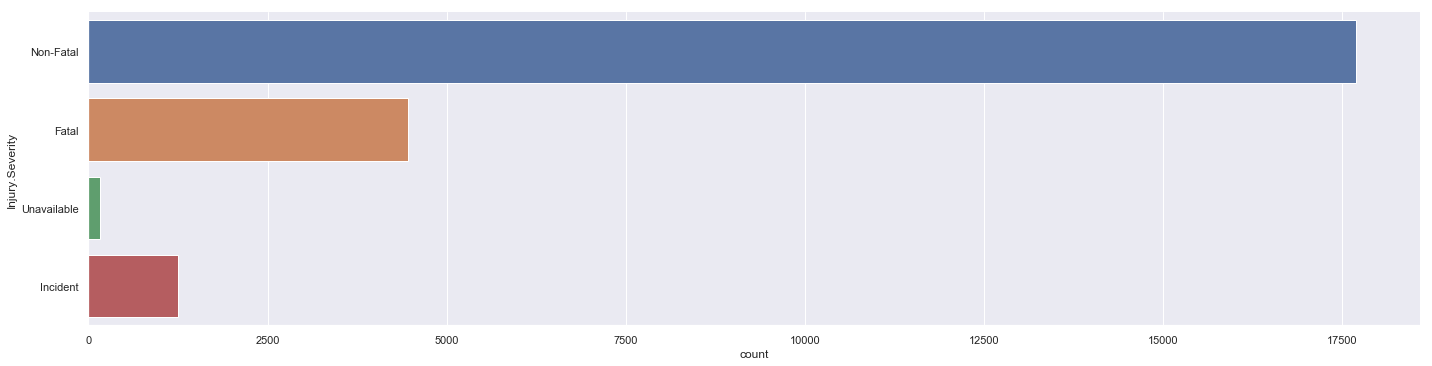

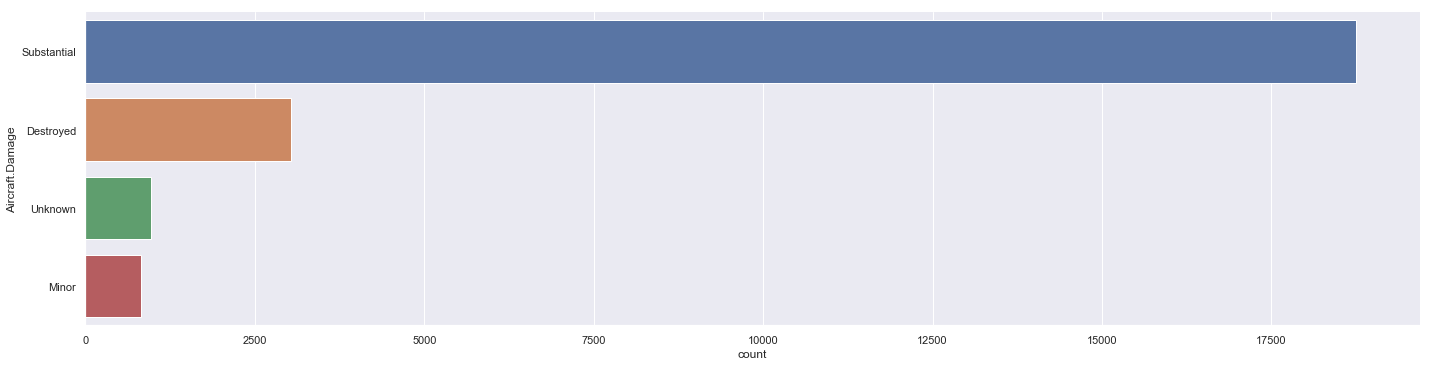

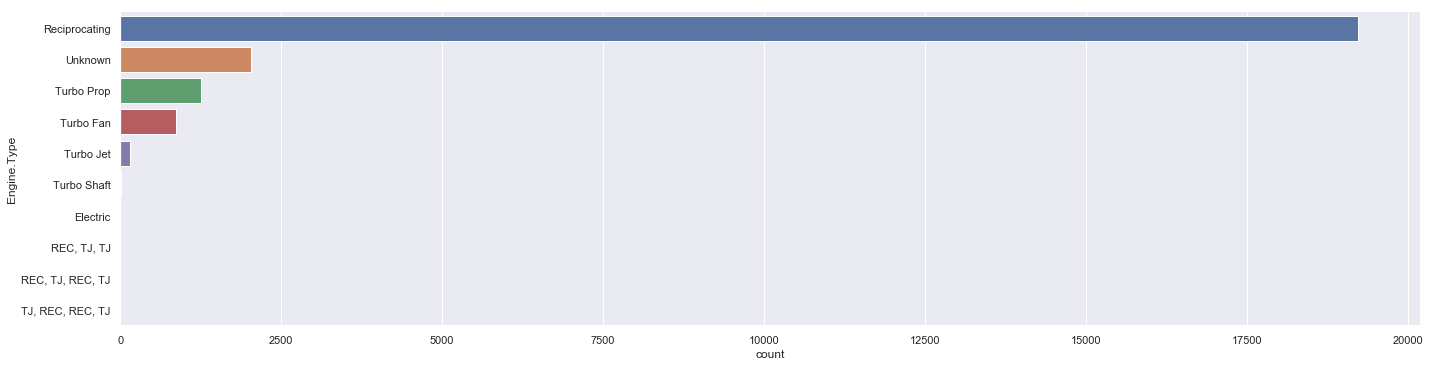

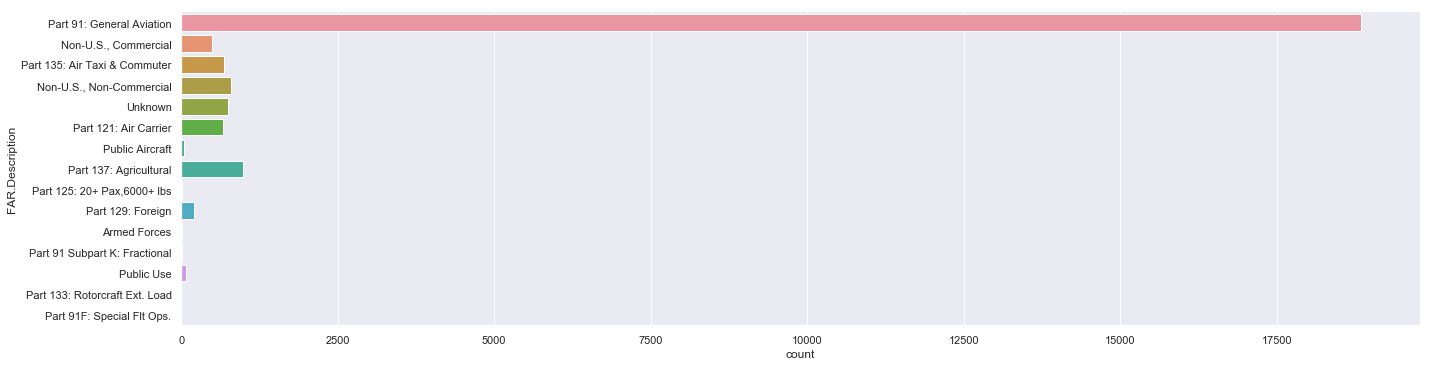

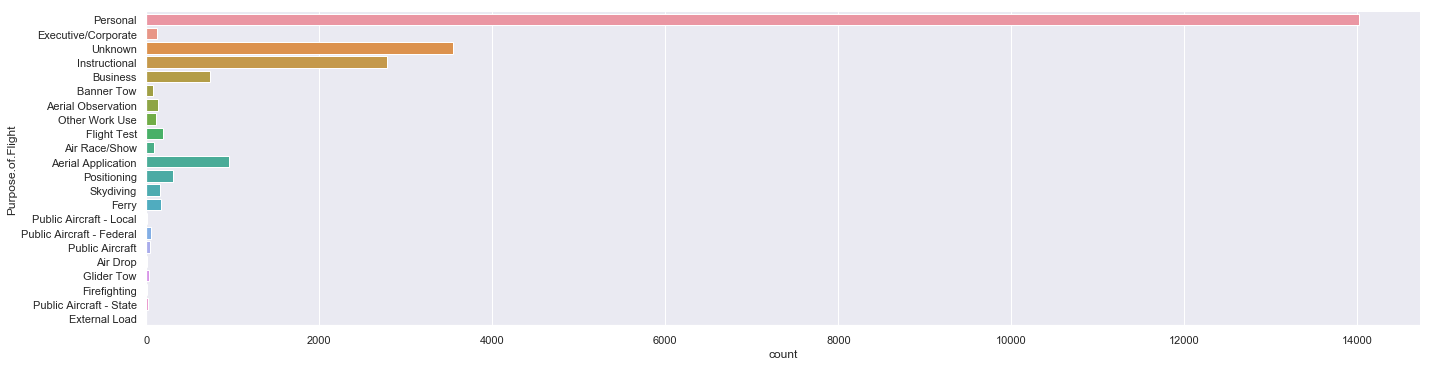

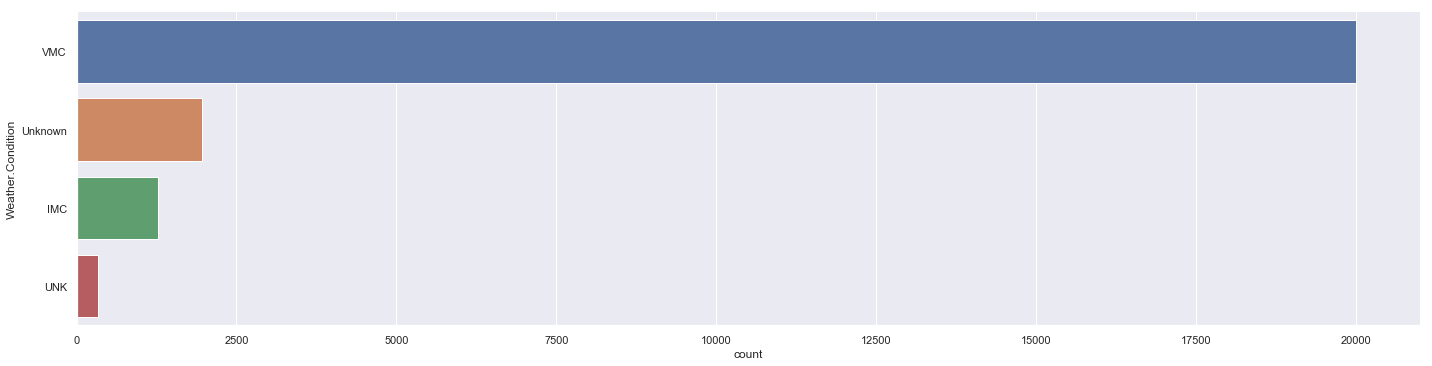

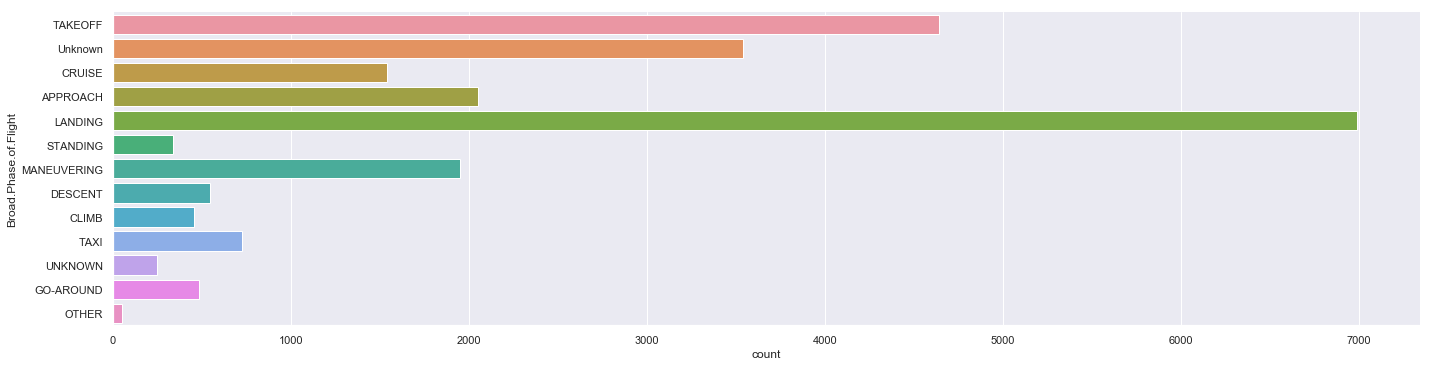

In [16]:
for i in aviationData:
    if(i == 'Make' or i == 'Model'):
        continue
    
    if(aviationData[i].dtypes != 'float64' and aviationData[i].dtypes != 'int64'):
        sb.catplot(y = i, data = aviationData, kind = "count", height = 5, aspect = 4)

C:\Users\Kenneth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


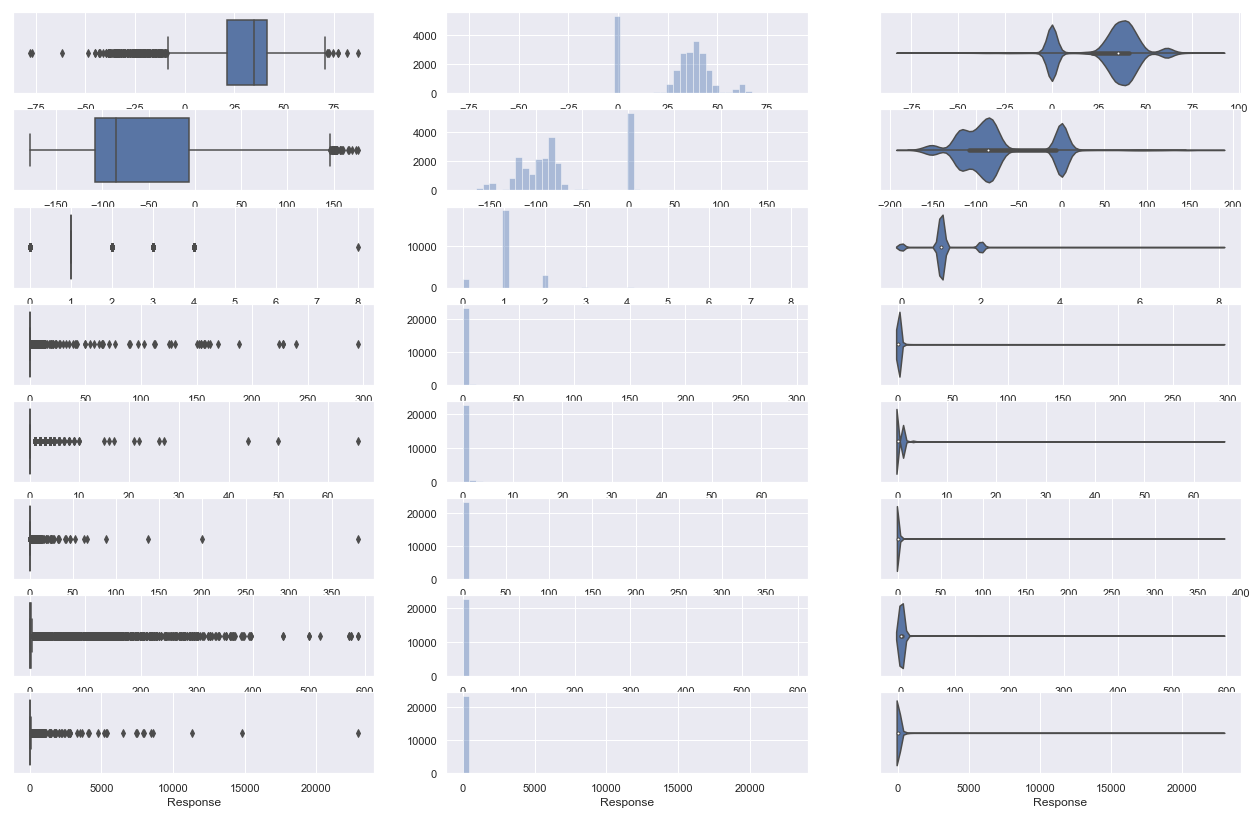

In [17]:
f, axes = plt.subplots(8,3, figsize=(22, 14))
count=0
for i in aviationData:
    if(aviationData[i].dtypes == 'float64' or aviationData[i].dtypes == 'int64'):
# #         f, axes = plt.subplots(1, 1, figsize=(24, 4))
# #         sb.boxplot(aviationData[i], orient = "h", color = "cornflowerblue")
# #         f, axes = plt.subplots(1, 1, figsize=(24, 12))
# #         sb.distplot(aviationData[i], color = "royalblue")
#         f, axes = plt.subplots(1, 1, figsize=(24, 12))
#         sb.violinplot(aviationData[i], color = "cornflowerblue")

# Set up matplotlib figure with three subplots
        

        # Plot the basic uni-variate figures for HP
        sb.boxplot(aviationData[i], orient = "h", ax = axes[count,0])
        sb.distplot(aviationData[i], kde = False, ax = axes[count,1])
        sb.violinplot(aviationData[i], ax = axes[count,2])
        count += 1

In [18]:
aviationData['Fatality.Rate'] = 0
aviationData['Fatality.Rate'] = aviationData['Fatality.Rate'].astype(float)

In [19]:
aviationData.head()

,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Response,Fatality.Rate
0,39.128611,-123.715833,Non-Fatal,Substantial,Cessna,175,1,Reciprocating,Part 91: General Aviation,Personal,0,0,0,1,VMC,TAKEOFF,0.000000,0.0
1,38.846111,-94.736111,Fatal,Destroyed,Mooney,M20S,1,Reciprocating,Part 91: General Aviation,Personal,2,0,0,0,VMC,TAKEOFF,100.000000,0.0
2,64.666945,-148.133334,Non-Fatal,Substantial,Cessna,170,1,Unknown,Part 91: General Aviation,Personal,0,0,0,2,Unknown,Unknown,0.000000,0.0
3,32.365556,-97.645000,Non-Fatal,Substantial,Vans,RV 10,0,Unknown,Part 91: General Aviation,Personal,0,0,0,1,Unknown,Unknown,0.000000,0.0
5,30.176111,-92.007500,Fatal,Destroyed,Piper,PA 31T,2,Turbo Prop,Part 91: General Aviation,Executive/Corporate,5,2,2,0,IMC,TAKEOFF,54.166667,0.0


In [20]:
for index, row in aviationData.iterrows():
    totalPassengers = row['Total.Uninjured'] + row['Total.Serious.Injuries'] + row['Total.Fatal.Injuries'] + row['Total.Minor.Injuries']
    if(totalPassengers == 0):
        totalPassengers = 1
    fatalityRate = (row['Total.Fatal.Injuries']/totalPassengers) * 100
    aviationData.at[index, 'Fatality.Rate'] = fatalityRate

In [21]:
aviationData.head()

,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Response,Fatality.Rate
0,39.128611,-123.715833,Non-Fatal,Substantial,Cessna,175,1,Reciprocating,Part 91: General Aviation,Personal,0,0,0,1,VMC,TAKEOFF,0.000000,0.000000
1,38.846111,-94.736111,Fatal,Destroyed,Mooney,M20S,1,Reciprocating,Part 91: General Aviation,Personal,2,0,0,0,VMC,TAKEOFF,100.000000,100.000000
2,64.666945,-148.133334,Non-Fatal,Substantial,Cessna,170,1,Unknown,Part 91: General Aviation,Personal,0,0,0,2,Unknown,Unknown,0.000000,0.000000
3,32.365556,-97.645000,Non-Fatal,Substantial,Vans,RV 10,0,Unknown,Part 91: General Aviation,Personal,0,0,0,1,Unknown,Unknown,0.000000,0.000000
5,30.176111,-92.007500,Fatal,Destroyed,Piper,PA 31T,2,Turbo Prop,Part 91: General Aviation,Executive/Corporate,5,2,2,0,IMC,TAKEOFF,54.166667,55.555556


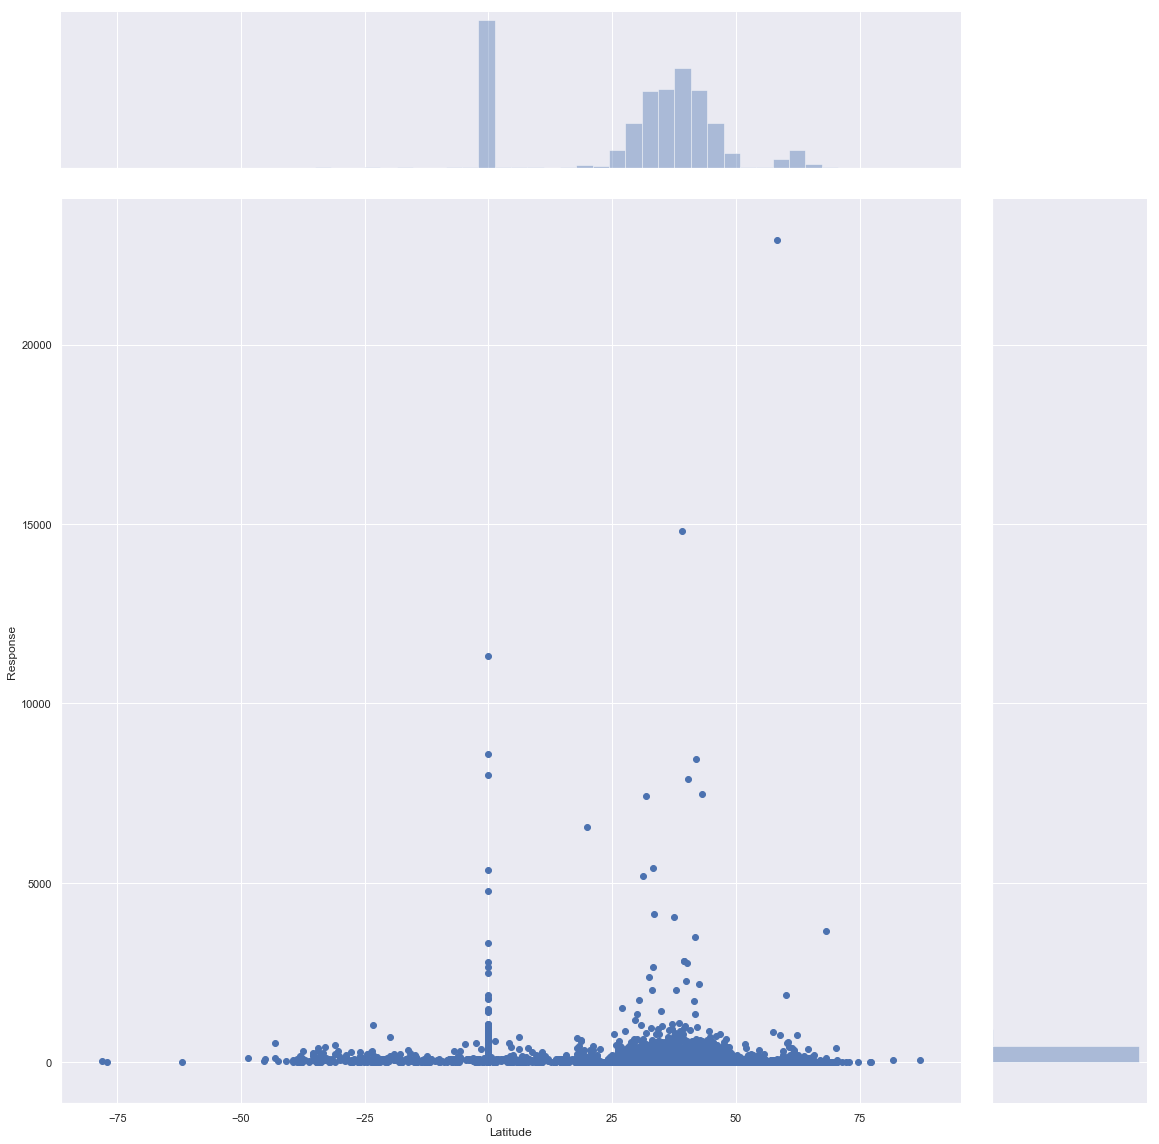

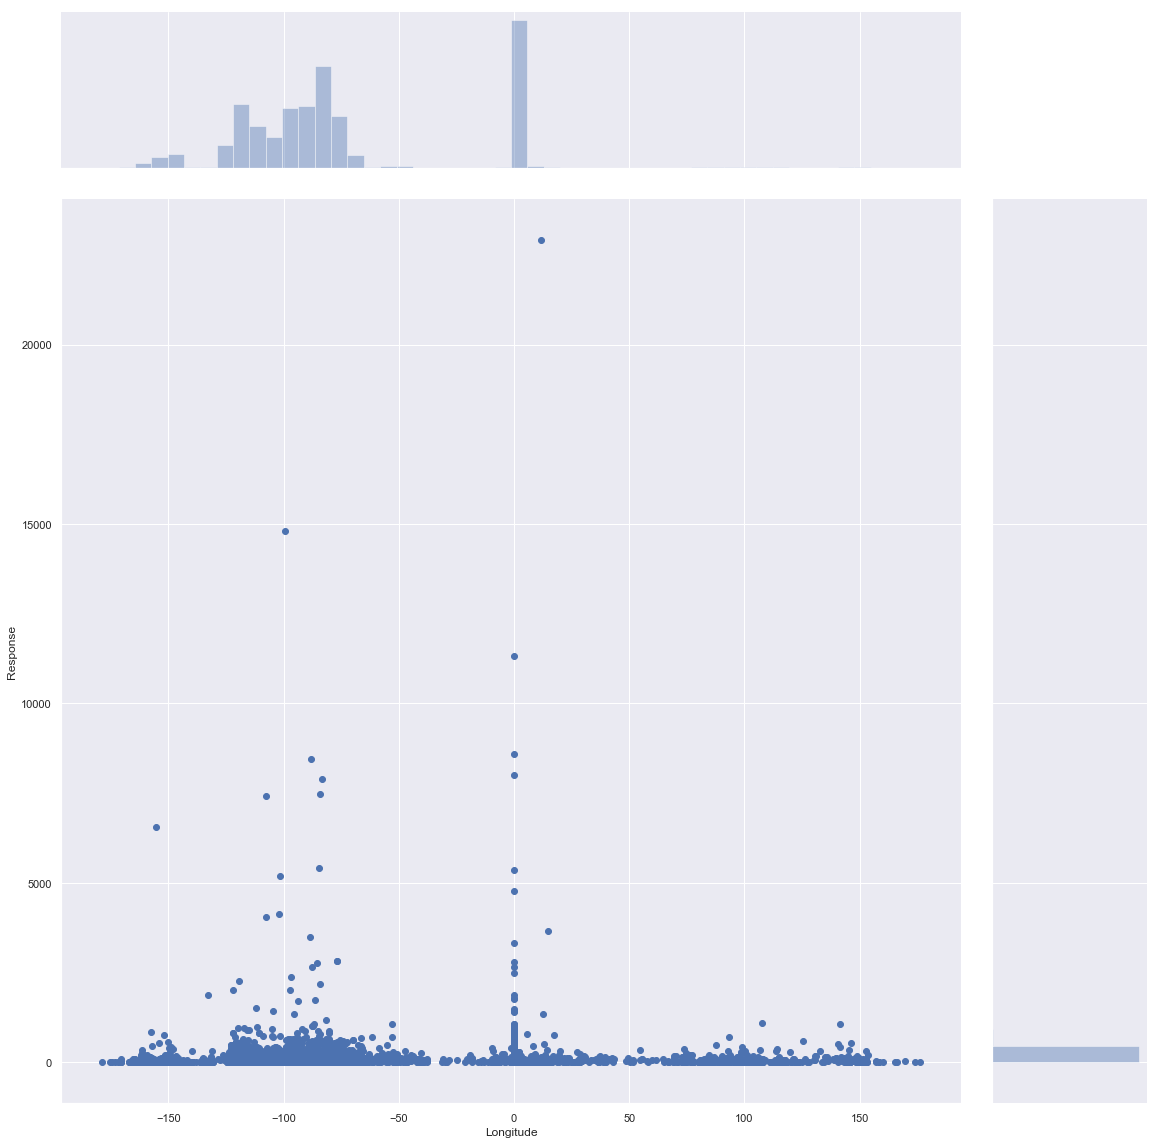

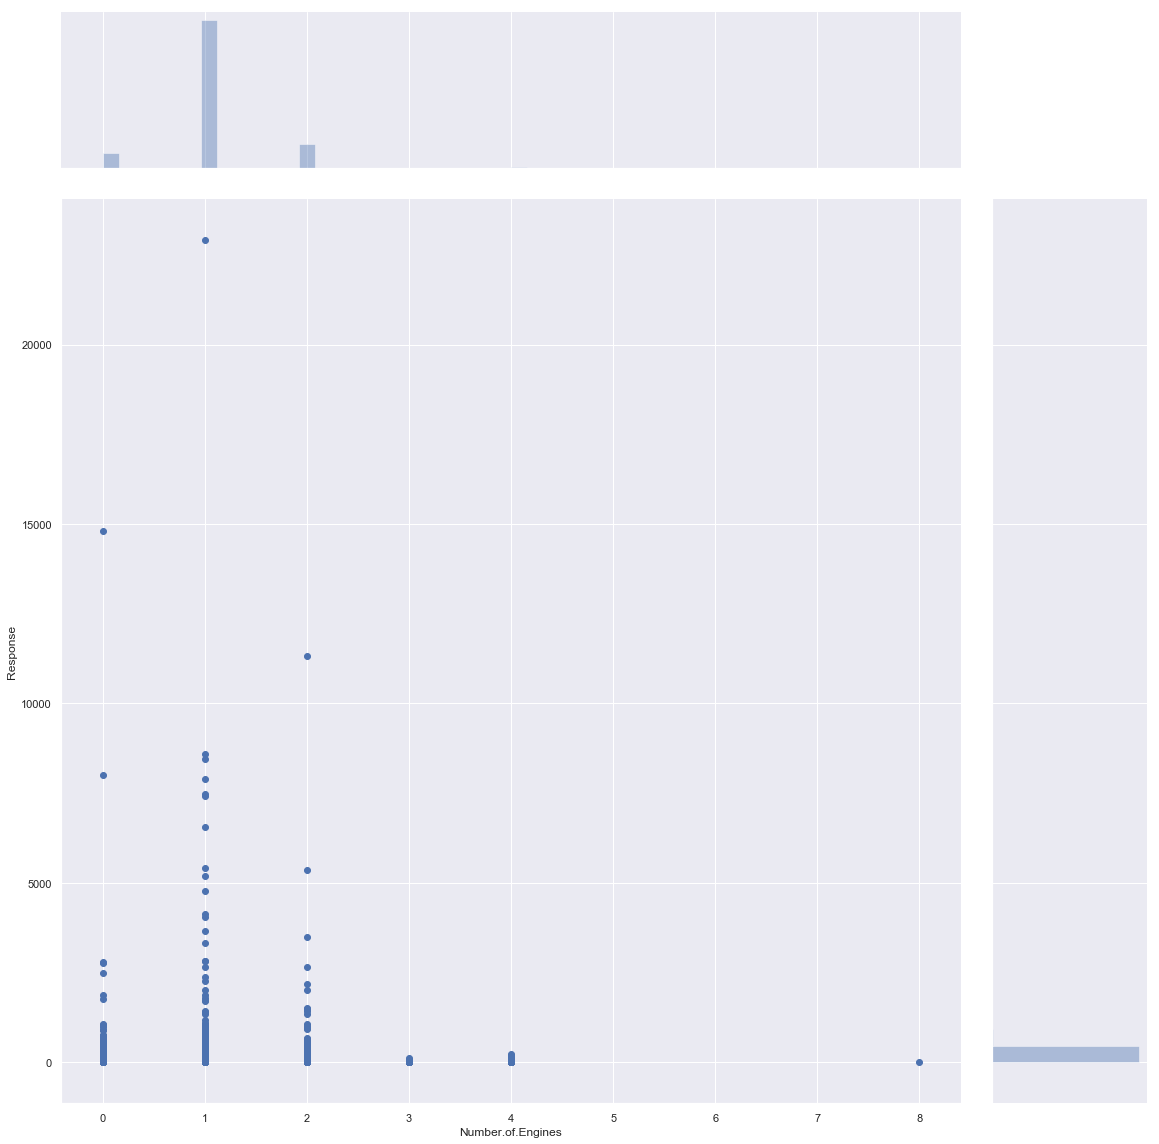

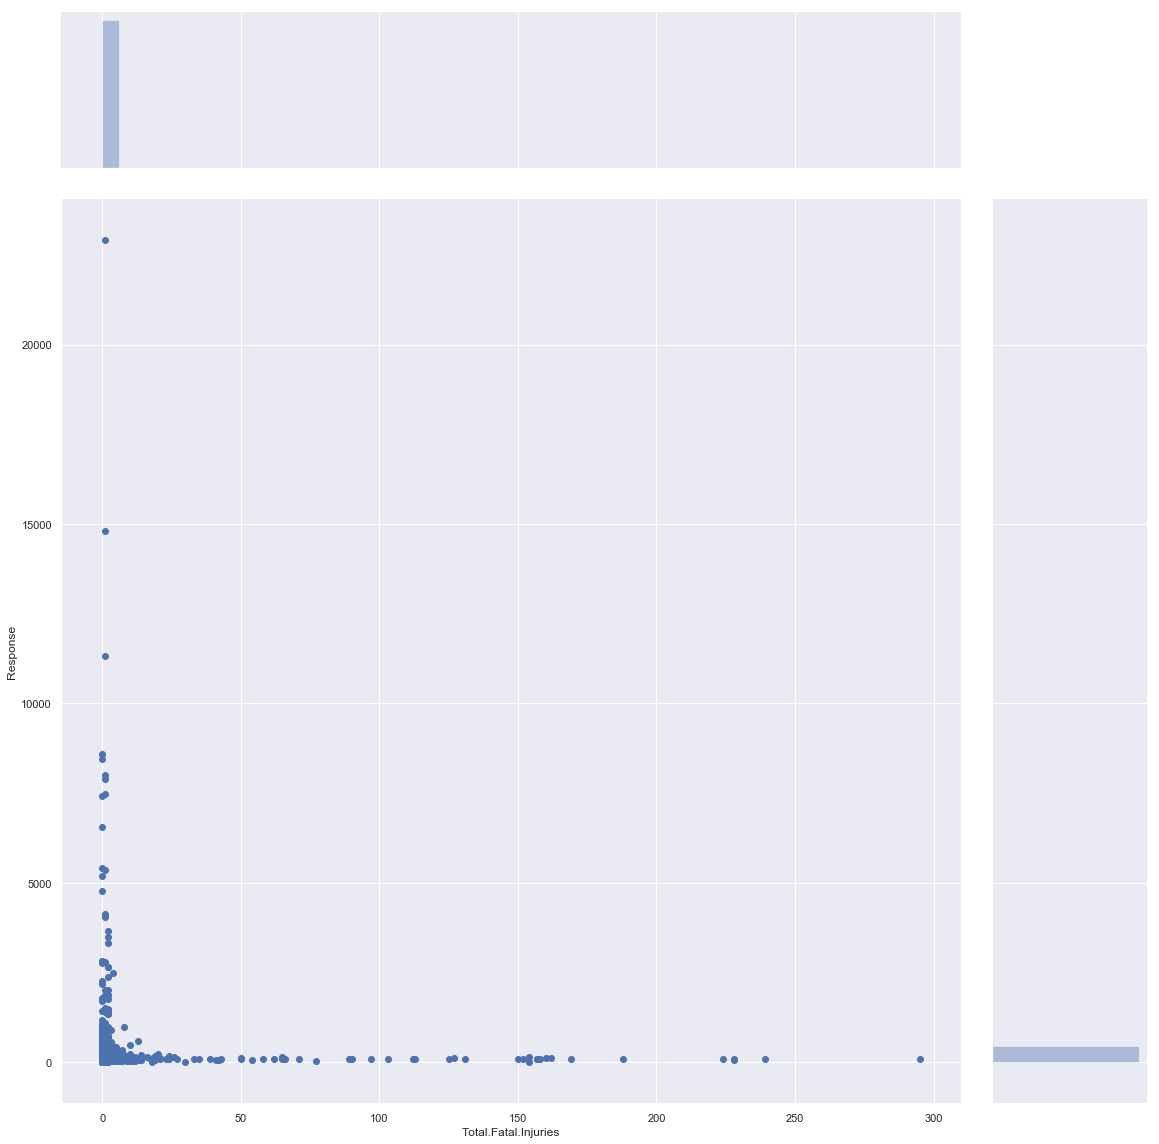

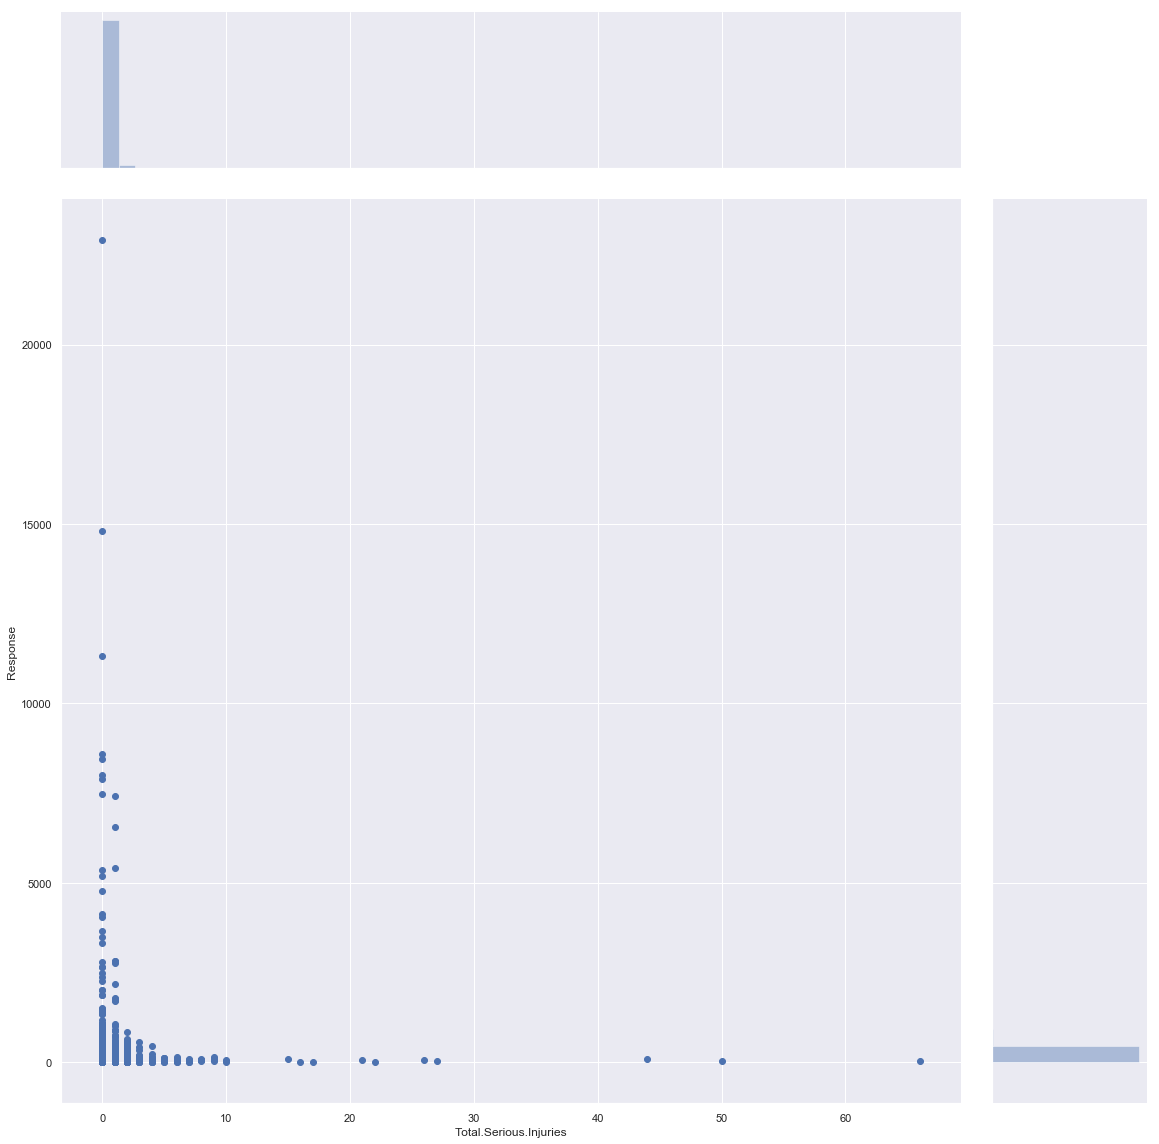

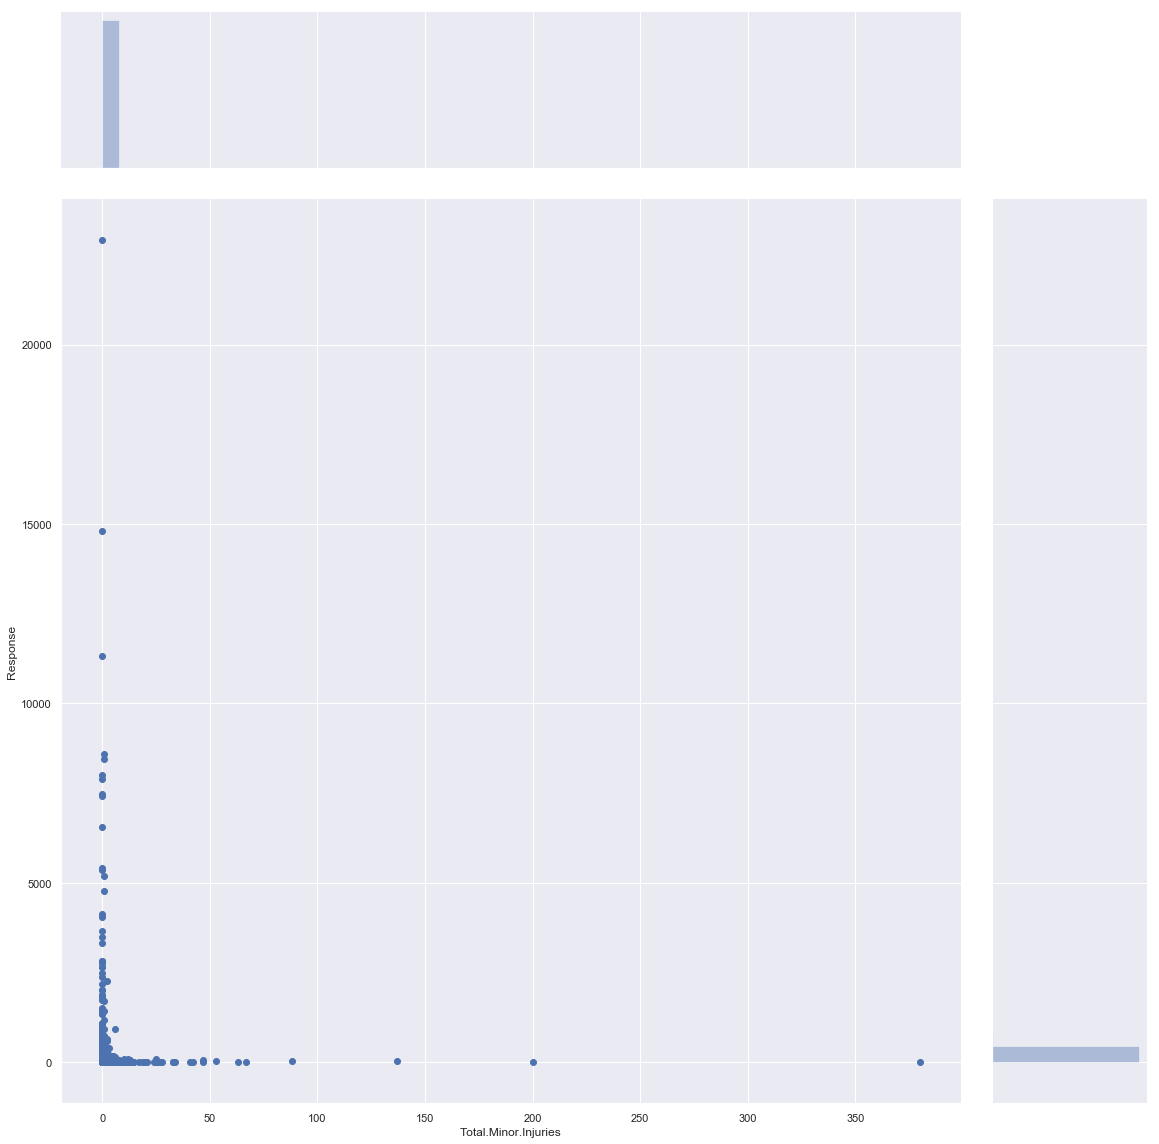

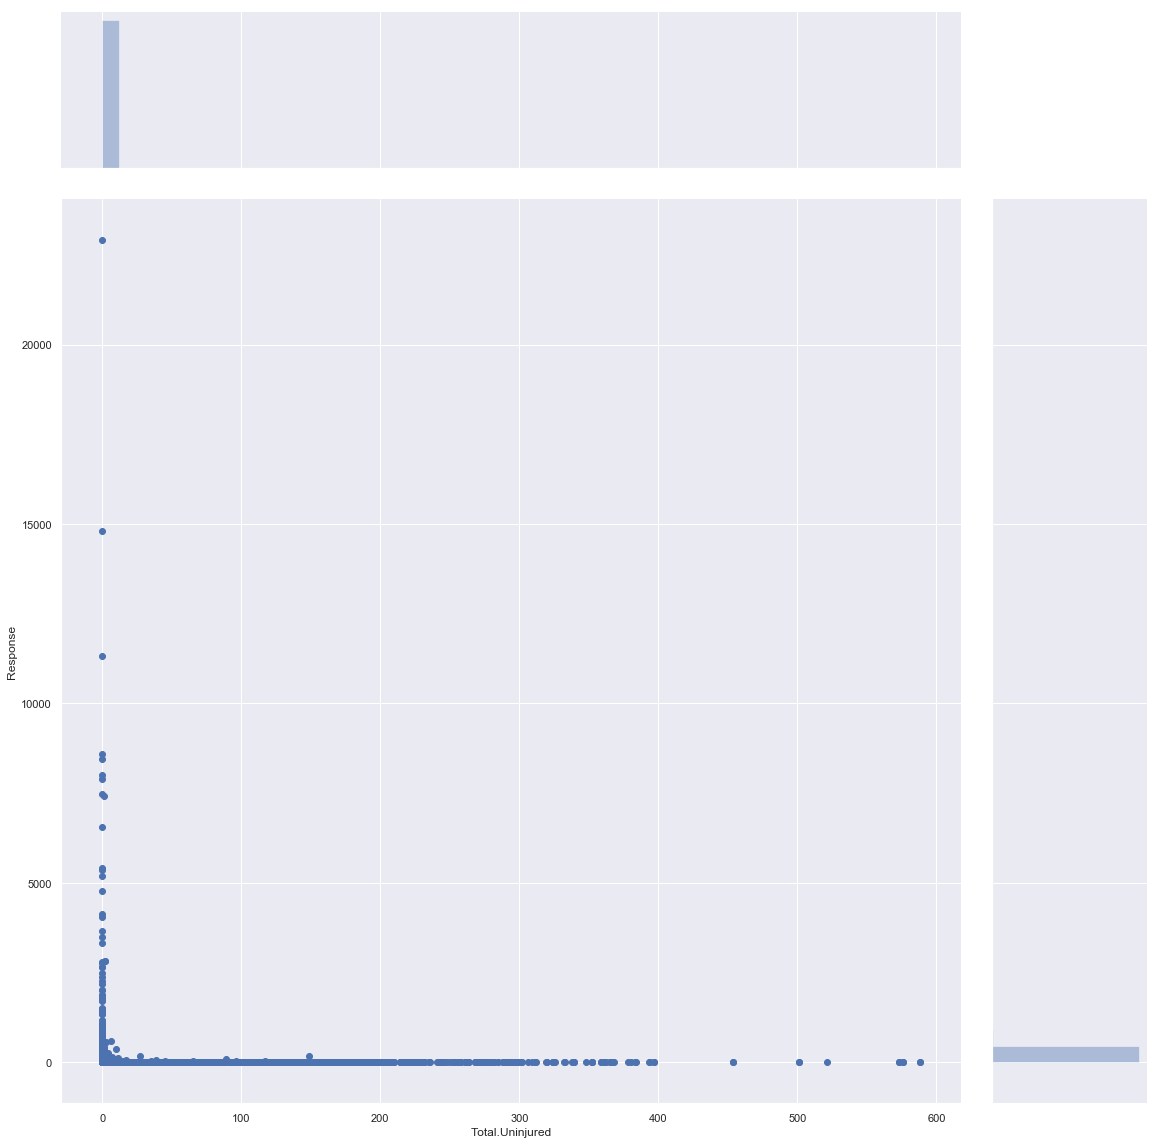

In [22]:
for i in aviationData:
    if(aviationData[i].dtypes == 'float64' or aviationData[i].dtypes == 'int64'):
        if(i == 'Response'):
            break
            
        # Create a joint dataframe by concatenating the two variables
        jointDF = pd.concat([aviationData[i], aviationData['Response'].reindex(index=aviationData[i].index)], sort = False, axis = 1)

        # Calculate the correlation between the two columns/variables
        jointDF.corr()

        sb.jointplot(x = aviationData[i], y = aviationData['Response'], height = 16)

In [23]:
for i in aviationData:
    if(aviationData[i].dtypes == 'float64' or aviationData[i].dtypes == 'int64'):
        if(i == 'Response'):
            break
            
        # Create a joint dataframe by concatenating the two variables
        jointDF = pd.concat([aviationData[i], aviationData['Response'].reindex(index=aviationData[i].index)], sort = False, axis = 1)

        # Calculate the correlation between the two columns/variables
        print(jointDF.corr())
        print("\n\n")

          Latitude  Response
Latitude  1.000000 -0.030308
Response -0.030308  1.000000



           Longitude  Response
Longitude   1.000000  0.039947
Response    0.039947  1.000000



                   Number.of.Engines  Response
Number.of.Engines            1.00000  -0.02232
Response                    -0.02232   1.00000



                      Total.Fatal.Injuries  Response
Total.Fatal.Injuries              1.000000  0.029579
Response                          0.029579  1.000000



                        Total.Serious.Injuries  Response
Total.Serious.Injuries                1.000000  0.019888
Response                              0.019888  1.000000



                      Total.Minor.Injuries  Response
Total.Minor.Injuries              1.000000 -0.000886
Response                         -0.000886  1.000000



                 Total.Uninjured  Response
Total.Uninjured         1.000000 -0.028336
Response               -0.028336  1.000000





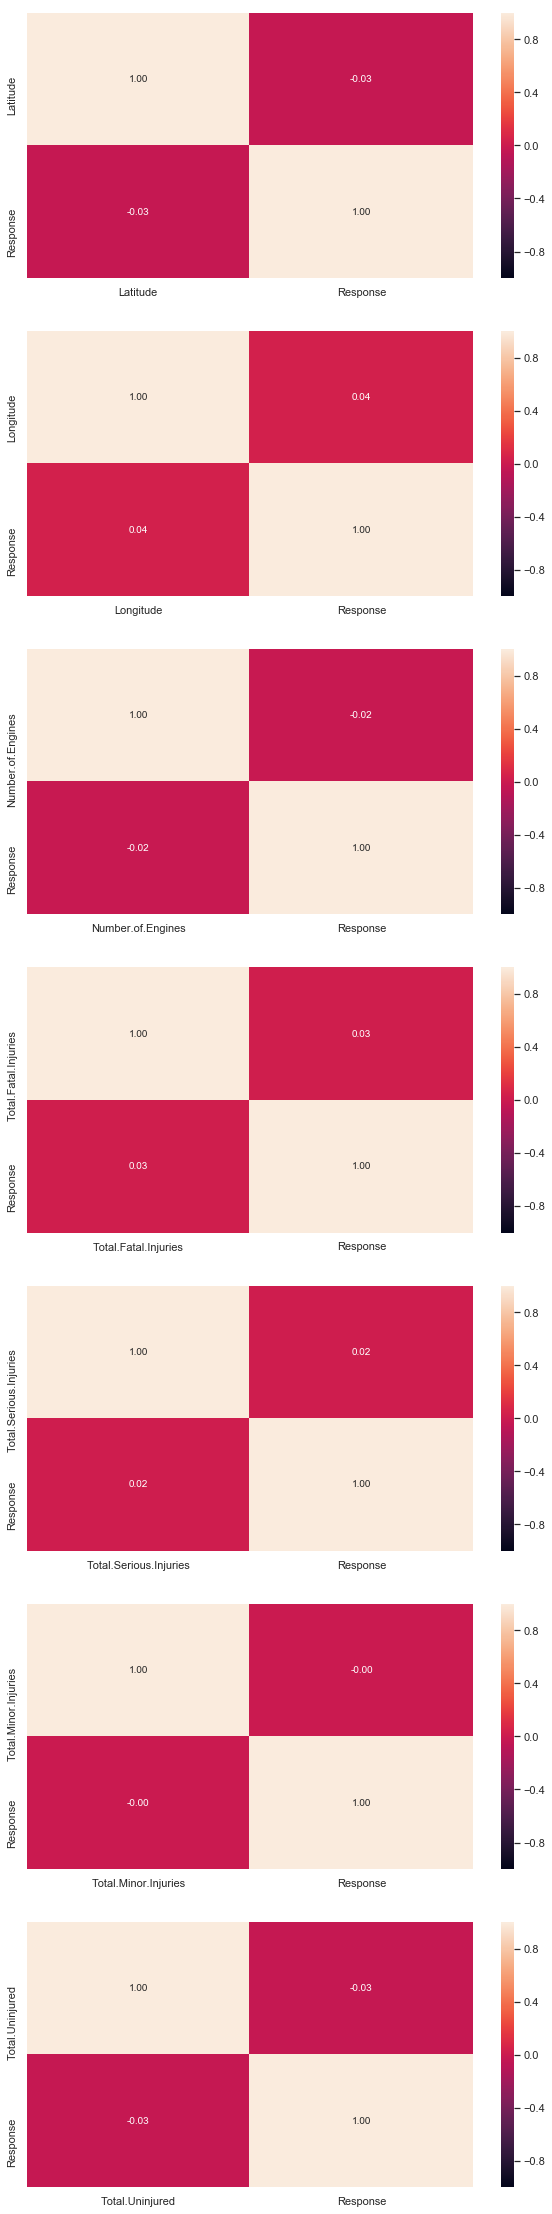

In [24]:
f, axes = plt.subplots(7, figsize=(10, 40))
count = 0
for i in aviationData:
    if(aviationData[i].dtypes == 'float64' or aviationData[i].dtypes == 'int64'):
        if(i == 'Response'):
            break
            
        # Create a joint dataframe by concatenating the two variables
        jointDF = pd.concat([aviationData[i], aviationData['Response'].reindex(index=aviationData[i].index)], sort = False, axis = 1)

        # Calculate the correlation between the two columns/variables
        sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax = axes[count])
        count += 1